In [1]:
# Importing all the important libraries
import pandas as pd
from sklearn.datasets import load_diabetes
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
import warnings
warnings.simplefilter(action='ignore')

In [2]:
df = load_diabetes()

In [3]:
#description of the dataset
df['DESCR']

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

In [4]:
cols = df.feature_names

In [5]:
target = df.target

In [6]:
data = df.data

In [7]:
data = pd.DataFrame(columns = cols, data = data)

In [8]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [46]:
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [9]:
data.shape

(442, 10)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [11]:
data.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [12]:
sns.set_style('darkgrid')

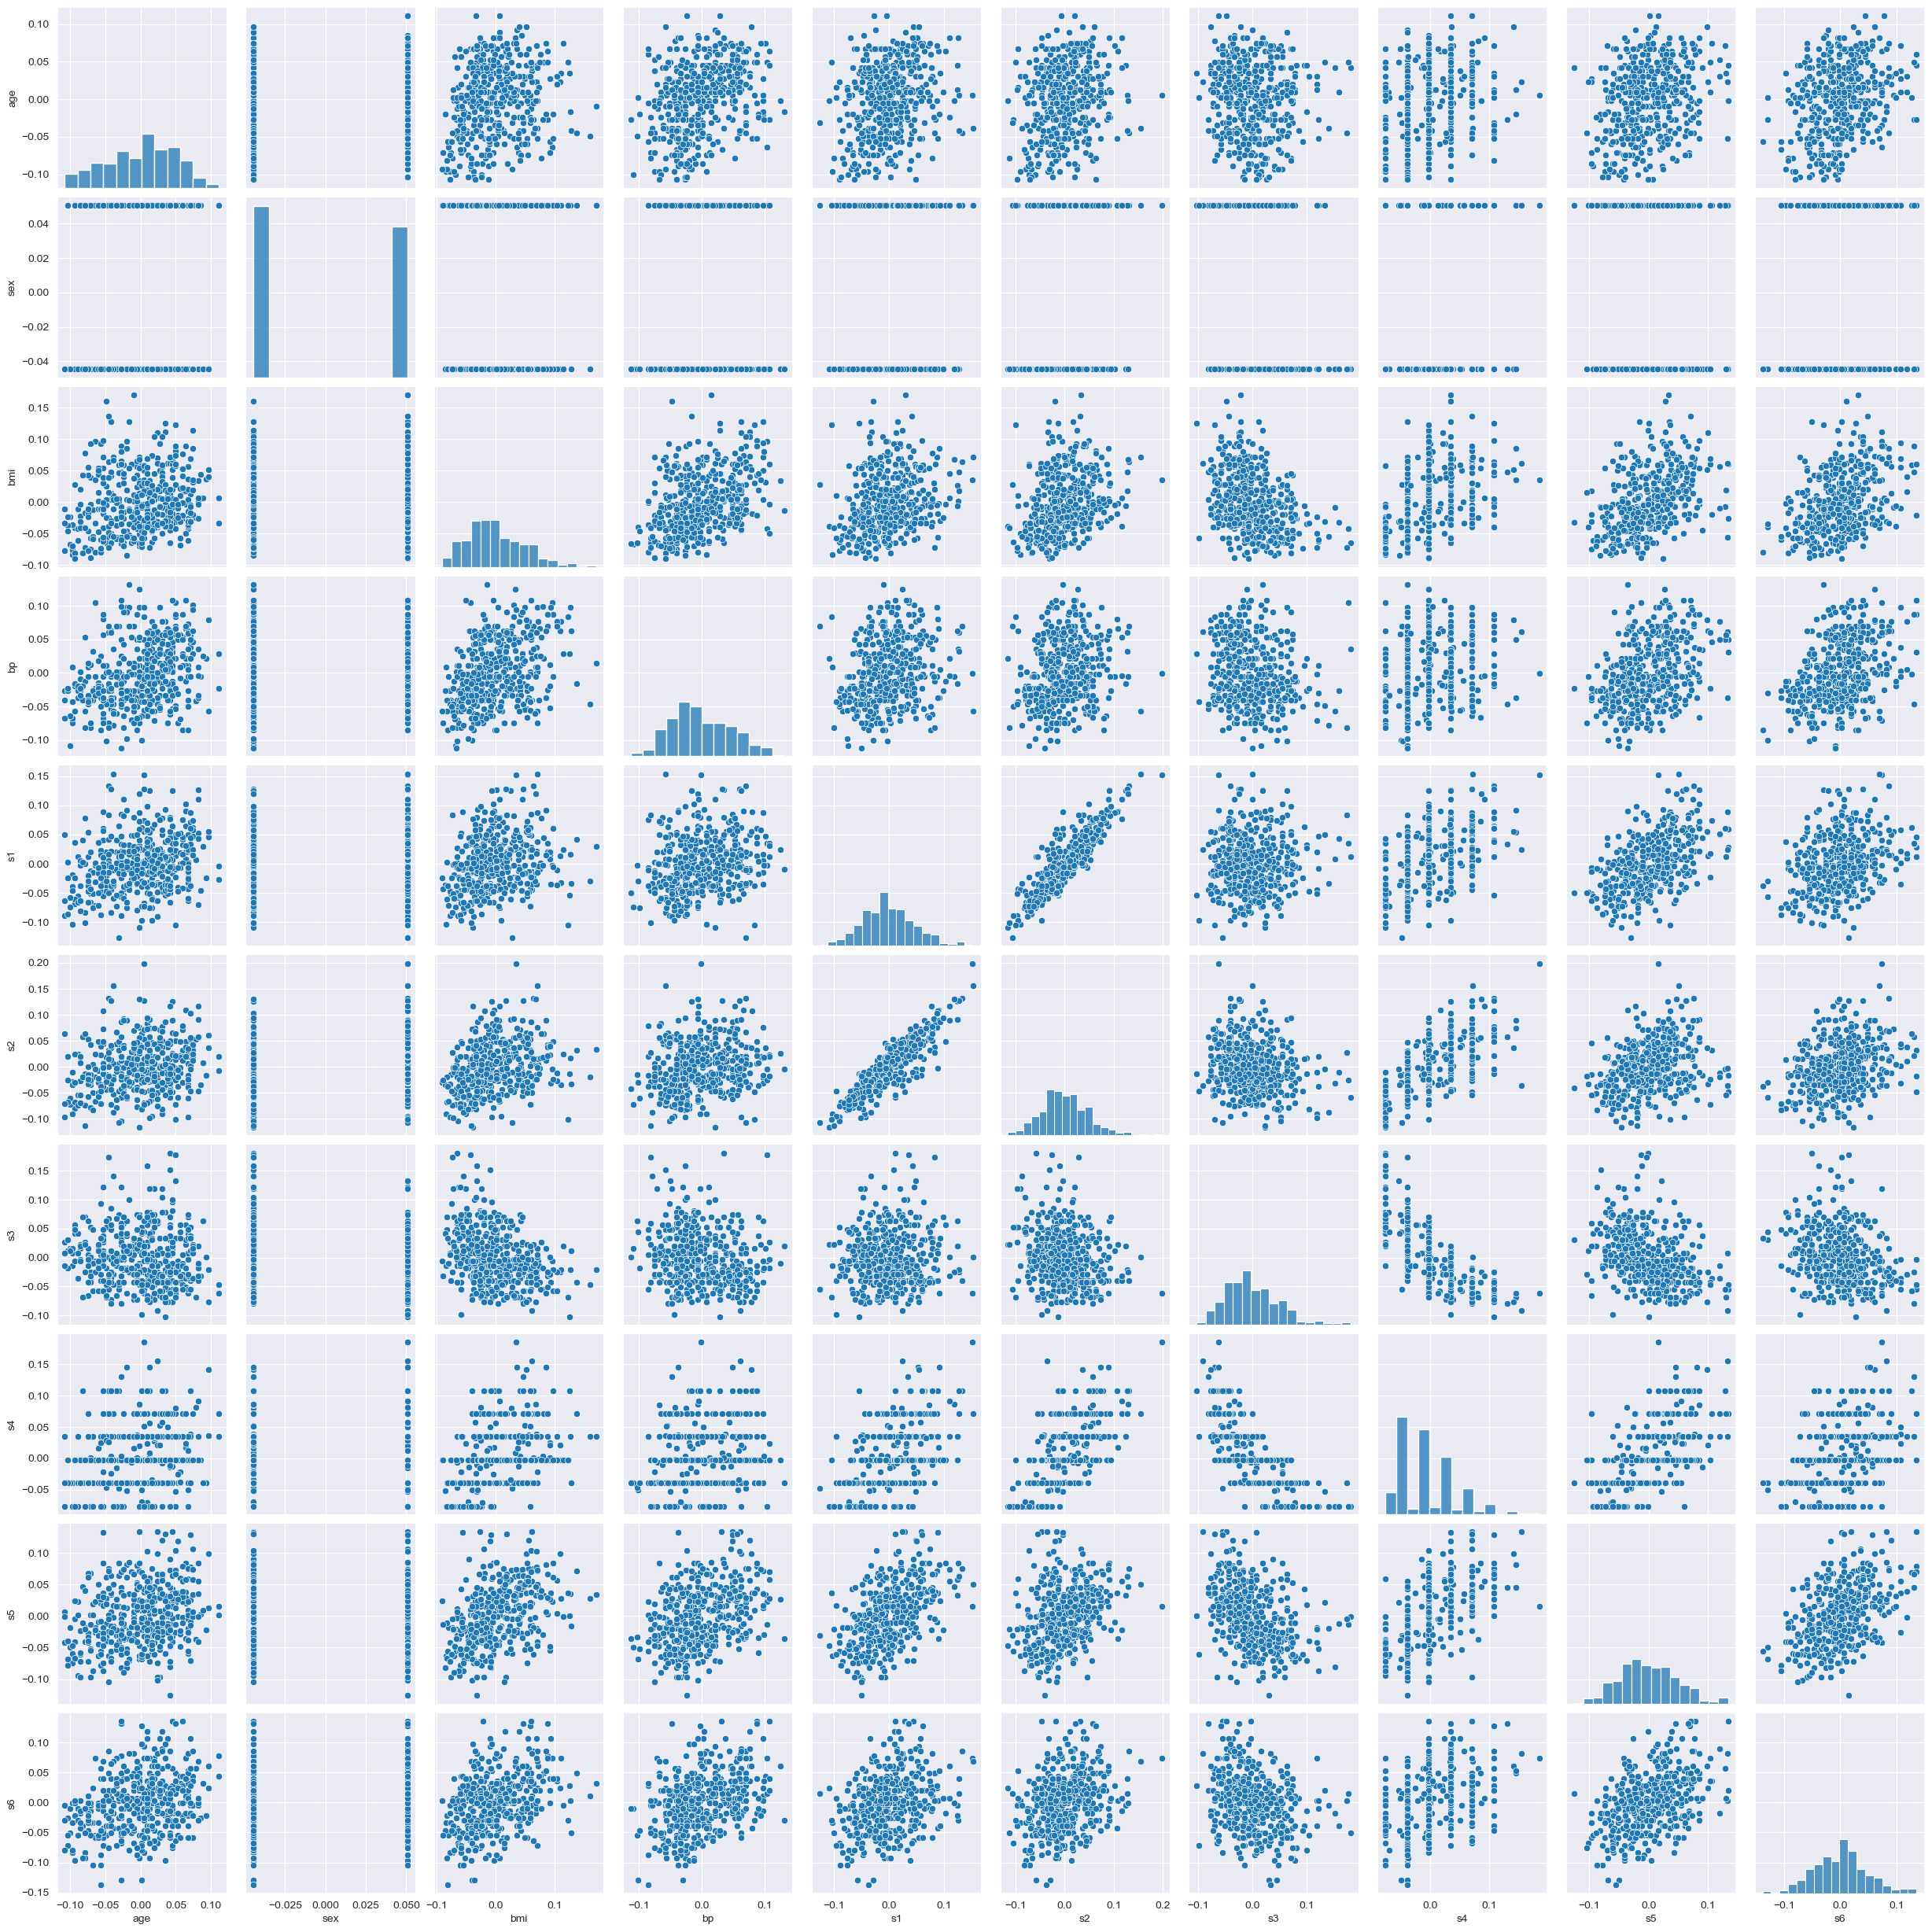

In [50]:
sns.pairplot(data)

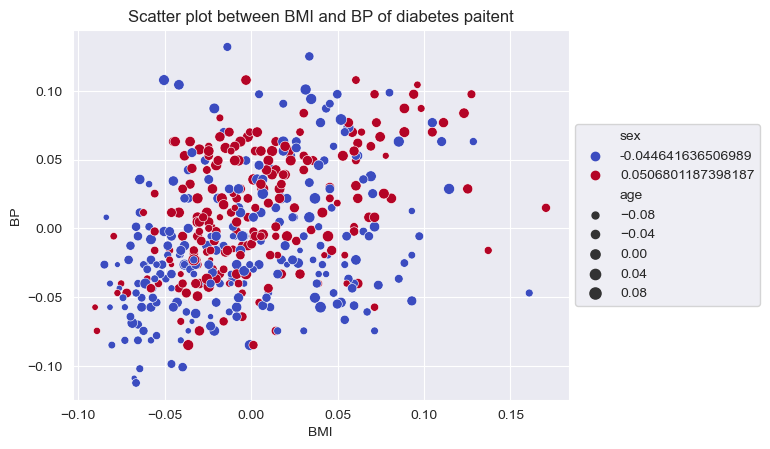

In [13]:
plt.title('Scatter plot between BMI and BP of diabetes paitent')
plt.xlabel('BMI')
plt.ylabel('BP')
sns.scatterplot(x = 'bmi', y='bp', hue ='sex', size = 'age', data = data, palette ='coolwarm')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#here values are encoded, for that reason, values are in float form.

In [14]:
target.shape

(442,)

In [15]:
target = pd.DataFrame(data = target)

In [16]:
target.head()

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [17]:
target.isnull().sum()

0    0
dtype: int64

In [18]:
#creating the object of the model
lr = LinearRegression()

In [19]:
#splitting the model
x_train,x_test, y_train, y_test = train_test_split(data, target, test_size = 0.25, random_state=105)

In [20]:
lr.fit(x_train, y_train)

LinearRegression()

In [21]:
pred = lr.predict(x_test)

In [22]:
print('MSE:',metrics.mean_squared_error(y_test, pred))
print('MAE:',metrics.mean_absolute_error(y_test, pred))
print('R2-Score:',(metrics.r2_score(y_test, pred)*100))

MSE: 3280.2014764735004
MAE: 47.73346525837847
R2-Score: 48.356547452400164


In [29]:
x_test.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
262,-0.016412,0.050680,0.127443,0.097616,0.016318,0.017475,-0.021311,0.034309,0.034864,0.003064
426,0.030811,0.050680,-0.034229,0.043677,0.057597,0.068831,-0.032356,0.057557,0.035462,0.085907
186,-0.081798,0.050680,0.042296,-0.019442,0.039710,0.057558,-0.069172,0.108111,0.047186,-0.038357
270,0.005383,0.050680,0.030440,0.083844,-0.037344,-0.047347,0.015505,-0.039493,0.008640,0.015491
150,0.023546,-0.044642,0.070319,0.025315,-0.034592,-0.014466,-0.032356,-0.002592,-0.019197,-0.009362


In [32]:
y_test.head()

,0
262,308.0
426,120.0
186,137.0
270,202.0
150,288.0


In [31]:
input_data = np.array([[-0.016412, 0.050680, 0.127443, 0.097616,
                        0.016318, 0.017475, -0.021311, 0.034309, 
                        0.034864, 0.003064]])
#RR2-score is very less, it means the accuracy of the model is not great.

In [33]:
lr.predict(input_data)

array([[254.04622104]])

Text(0, 0.5, 'True y value')

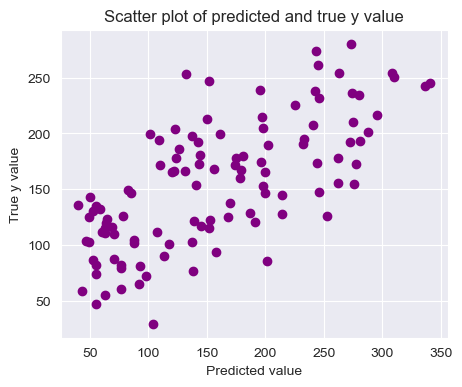

In [25]:
plt.figure(figsize = (5,4))
plt.scatter(x = y_test, y = pred, color = 'purple')
plt.title('Scatter plot of predicted and true y value')
plt.xlabel('Predicted value')
plt.ylabel('True y value')

In [26]:
res = pd.DataFrame(y_test-pred)

In [49]:
res

,0
262,53.954171
426,-45.583241
186,-60.940132
270,12.388053
150,86.664423
...,...
32,96.136310
37,121.531820
195,-44.283141
137,45.431412


<AxesSubplot:title={'center':'Residuals'}, ylabel='Density'>

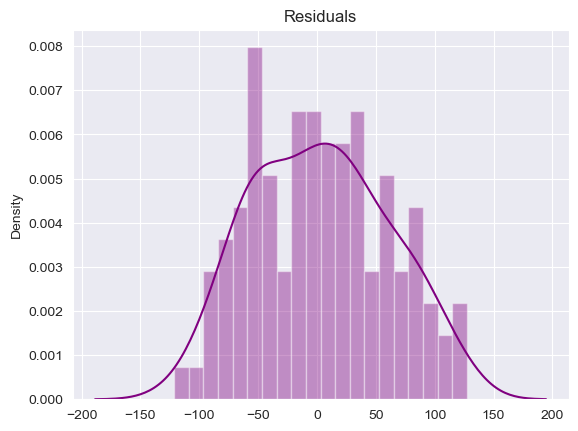

In [27]:
plt.title('Residuals')
sns.distplot(res, bins = 20, color ='purple')